# PDF to Text - 03 Bike Arrests

### YOUR ASSIGNMENT
1.	Find three PDF-based datasets,
2.	Convert them to a machine-readable format (txt, csv, etc), and
3.	Do a little something with them.

What is "a little something"?   
•	If you create a text file, clean it up if necessary and extract some information from it. For example, for the custodial_reports  you could have extracted the Report Date and the Agency Number. You can do this work in either Python or a text editor (depending on which is best).  
•	If make a CSV file, clean it up however necessary and ask it a few questions. For example, with the marijuana dataset we could have graphed the change in marijuana arrests over time.  
•	If you extracted right from Python, you should save it in some nice format (a txt file or a csv file)  
The focus of this assignment is generating machine-readable data, so your analysis doesn't have to be very interesting at all.  

SUBMITTING
Create a folder for each dataset on your GitHub repository. This folder should include
1.	The original data
2.	The cleaned data
3.	Any files you used in the process (uzn files, notebooks, etc)
4.	A summary of what you did (see below)

The summary should be a .txt or .md file explaining:  
•	The MuckRock page you got it from  
•	A one-sentence summary of what the data is  
•	A short description of how you processed/cleaned it  

In [1]:
import pandas as pd
import geopandas as gpd
%matplotlib inline
import re
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3
from geopy.geocoders import ArcGIS
from shapely.geometry import Point, Polygon
import time

### Our PDF had a nice tabular structure of its data, so we parsed it already through Tabula to generate a CSV file to use with pandas
Source: https://www.muckrock.com/foi/chicago-169/bike-tickets-arrest-38464/

In [2]:
arrests = pd.read_csv('tabula-Documents_for_P062407_part_2.csv')
arrests.head(5)

,Arrest Date,Street No,Street Direction,Street name,Arrest ID,Statute,Statute Description,Age,Race
0,3-Sep-12,9XX,W,WILSON AVE,16416248,720 ILCS 550.0/4-A,CANNABIS - POSSESS LESS THAN 2.5 GRMS,30,ASIAN/PACIFIC ISLANDER
1,19-Jun-16,56XX,S,ABERDEEN ST,17265153,9-52-020,RIDING BICYCLE ON SIDEWALK,18,BLACK
2,4-Nov-12,55XX,S,PRINCETON AVE,16461059,720 ILCS 550.0/4-B,CANNABIS - POSSESS 2.5-10 GRMS,36,BLACK
3,7-Mar-13,4XX,S,SACRAMENTO BLVD,16540607,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,20,BLACK
4,4-Mar-13,13XX,S,INDEPENDENCE BLVD,16538898,625 ILCS 5.0/6-303-D,FELONY DRIVING WHILE LICENSE SUSPENDED OR REVO...,38,BLACK


#### Delete those XX's from the Street Number

In [3]:
arrests['Street No'] = arrests['Street No'].str.replace('XX', '')
arrests

,Arrest Date,Street No,Street Direction,Street name,Arrest ID,Statute,Statute Description,Age,Race
0,3-Sep-12,9,W,WILSON AVE,16416248,720 ILCS 550.0/4-A,CANNABIS - POSSESS LESS THAN 2.5 GRMS,30,ASIAN/PACIFIC ISLANDER
1,19-Jun-16,56,S,ABERDEEN ST,17265153,9-52-020,RIDING BICYCLE ON SIDEWALK,18,BLACK
2,4-Nov-12,55,S,PRINCETON AVE,16461059,720 ILCS 550.0/4-B,CANNABIS - POSSESS 2.5-10 GRMS,36,BLACK
3,7-Mar-13,4,S,SACRAMENTO BLVD,16540607,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,20,BLACK
4,4-Mar-13,13,S,INDEPENDENCE BLVD,16538898,625 ILCS 5.0/6-303-D,FELONY DRIVING WHILE LICENSE SUSPENDED OR REVO...,38,BLACK
5,16-May-14,50,W,CONGRESS PKWY,16827404,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),64,BLACK
6,28-Feb-14,67,S,MARSHFIELD AVE,16777433,1-4-145-A,FAILURE TO APPEAR IN COURT,25,BLACK
7,13-Mar-13,16,W,HOWARD ST,16545017,720 ILCS 550.0/4-B,CANNABIS - POSSESS 2.5-10 GRMS,41,BLACK
8,12-Jul-13,3,E,47TH ST,16631631,720 ILCS 550.0/4-B,CANNABIS - POSSESS 2.5-10 GRMS,47,BLACK
9,30-Sep-14,70,S,PERRY AVE,16918050,625 ILCS 5.0/11-501-A-2,IVC - DRIVING UNDER INFLUENCE OF ALCOHOL,26,BLACK


#### Delete the headers of the 2nd, 3rd, ..... pages

In [4]:
arrests = arrests[~arrests['Arrest Date'].str.contains('Arrest', na=False)]
arrests

,Arrest Date,Street No,Street Direction,Street name,Arrest ID,Statute,Statute Description,Age,Race
0,3-Sep-12,9,W,WILSON AVE,16416248,720 ILCS 550.0/4-A,CANNABIS - POSSESS LESS THAN 2.5 GRMS,30,ASIAN/PACIFIC ISLANDER
1,19-Jun-16,56,S,ABERDEEN ST,17265153,9-52-020,RIDING BICYCLE ON SIDEWALK,18,BLACK
2,4-Nov-12,55,S,PRINCETON AVE,16461059,720 ILCS 550.0/4-B,CANNABIS - POSSESS 2.5-10 GRMS,36,BLACK
3,7-Mar-13,4,S,SACRAMENTO BLVD,16540607,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,20,BLACK
4,4-Mar-13,13,S,INDEPENDENCE BLVD,16538898,625 ILCS 5.0/6-303-D,FELONY DRIVING WHILE LICENSE SUSPENDED OR REVO...,38,BLACK
5,16-May-14,50,W,CONGRESS PKWY,16827404,720 ILCS 570.0/402-C,PCS - POSSESSION - POSS AMT CON SUB EXCEPT (A)(D),64,BLACK
6,28-Feb-14,67,S,MARSHFIELD AVE,16777433,1-4-145-A,FAILURE TO APPEAR IN COURT,25,BLACK
7,13-Mar-13,16,W,HOWARD ST,16545017,720 ILCS 550.0/4-B,CANNABIS - POSSESS 2.5-10 GRMS,41,BLACK
8,12-Jul-13,3,E,47TH ST,16631631,720 ILCS 550.0/4-B,CANNABIS - POSSESS 2.5-10 GRMS,47,BLACK
9,30-Sep-14,70,S,PERRY AVE,16918050,625 ILCS 5.0/11-501-A-2,IVC - DRIVING UNDER INFLUENCE OF ALCOHOL,26,BLACK


#### Create address column from Street Number, Street Direction and Street Name. Add a Chicago at the end.
That was created in order to reverse geocode all the arrests, but in the end geopy wasn't yielding any results (either Nominatim module or Google or ArcGIS, due to 'Service Timeouts' and ' Exceeding limits'.

In [5]:
arrests['address'] = arrests.apply(lambda row: str(row['Street No']) + ' ' + str(row['Street Direction']) + ' ' + str(row['Street name']) + ' ' + 'CHICAGO', axis=1)
arrests.head(5)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Arrest Date,Street No,Street Direction,Street name,Arrest ID,Statute,Statute Description,Age,Race,address
0,3-Sep-12,9,W,WILSON AVE,16416248,720 ILCS 550.0/4-A,CANNABIS - POSSESS LESS THAN 2.5 GRMS,30,ASIAN/PACIFIC ISLANDER,9 W WILSON AVE CHICAGO
1,19-Jun-16,56,S,ABERDEEN ST,17265153,9-52-020,RIDING BICYCLE ON SIDEWALK,18,BLACK,56 S ABERDEEN ST CHICAGO
2,4-Nov-12,55,S,PRINCETON AVE,16461059,720 ILCS 550.0/4-B,CANNABIS - POSSESS 2.5-10 GRMS,36,BLACK,55 S PRINCETON AVE CHICAGO
3,7-Mar-13,4,S,SACRAMENTO BLVD,16540607,725 ILCS 5.0/110-3,ISSUANCE OF WARRANT,20,BLACK,4 S SACRAMENTO BLVD CHICAGO
4,4-Mar-13,13,S,INDEPENDENCE BLVD,16538898,625 ILCS 5.0/6-303-D,FELONY DRIVING WHILE LICENSE SUSPENDED OR REVO...,38,BLACK,13 S INDEPENDENCE BLVD CHICAGO


### Most Frequent Statute Violations

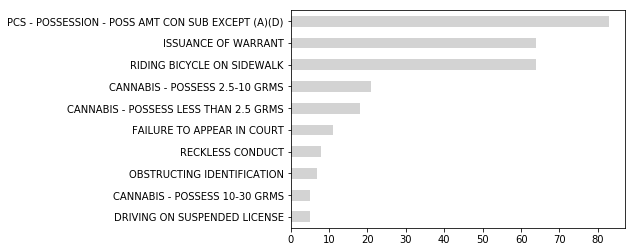

In [6]:
ax = arrests['Statute Description'].value_counts().head(10).sort_values().plot(kind='barh', color='lightgrey')

### Most Frequent Ages of the Arrested

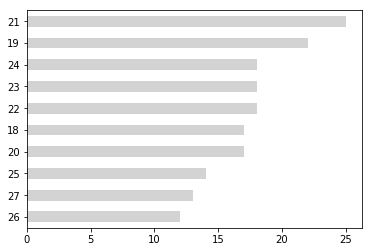

In [7]:
ax = arrests['Age'].value_counts().head(10).sort_values().plot(kind='barh', color='lightgrey')

### Most Frequent Race of the Arrested

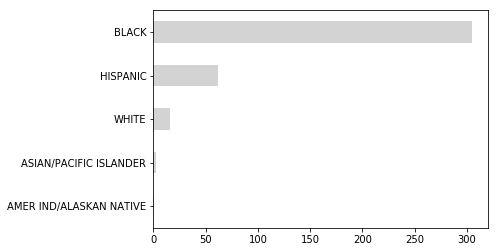

In [8]:
ax = arrests['Race'].value_counts().head(10).sort_values().plot(kind='barh', color='lightgrey')